<a href="https://colab.research.google.com/github/100451218/Grupo42-Practica1/blob/main/Estudio_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100451218- Sergi Vila Marín

100451058-Daniel Obreo Sanz

# Análisis exploratorio de datos

Para el análisis exploratorio de datos vamos a observar:
1. Qué valores son siempre 0
2. Qué valores son constantes
3. Qué correlación hay entre columnas
4. Qué correlación hay entre las columnas y la salida
5. Hipótesis


### Importamos las librerías y cargamos los datos


In [3]:
!pip install pd
!pip install seaborn

import pandas as pd
#Importamos los dos conjuntos de datos.
disp_df = pd.read_csv("disp_st42ns1.txt.bz2",
 compression="bz2", 
 index_col=0)
comp_df = pd.read_csv("comp_st42ns1.txt.bz2", 
 compression="bz2", 
 index_col=0)
#print(disp_df['apcp_sf1_1'][0])
pd.set_option('display.max_columns', None)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Comprobamos valores a 0


In [4]:
for i in disp_df:
  if disp_df[i].sum()==0:
    print(i)
  """Con esta linea podemos ver las filas con todos los valores en 0, ya que 
  vemos después que no hay números negativos"""
  # print(i ,": ",disp_df[i].value_counts())
  for k in range(len(disp_df[i])):
    if disp_df[i][k]<0:
      """Si hubiera un número negativo se imprimiría hay"""
      print("Hay")

uswrf_s1_1


Hemos podido observar que la columna uswrf_s1_1 es inútil

### Comprobamos valores constantes


In [5]:
#También vamos a comprobar si el valor es constante
"""print(disp_df["uswrf_s1_1"].nunique())"""
#Cómo hemos dicho antes, sólo hay un número único
for i in disp_df:
  if disp_df[i].nunique()==1:
    print(i)

uswrf_s1_1


Sale la misma columna ya que es constante en 0


### Comprobamos correlación entre columnas

Vamos a mirar para un umbral de 0.95

In [6]:
list=[]
for i in disp_df:
  for k in disp_df:
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(list)

dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s3_1 ,  dlwrf_s4_1  :  0.9714313070426391
dlwrf_s3_1 ,  dlwrf_s5_1  :  0.9628906707604897
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  dswrf_s3_1  :  0.9571667754289556
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
dswrf_s3_1 ,  uswrf_s2_1  :  0.964297736448637
dswrf_s3_1 ,  uswrf_s3_1  :  0.9620365523744548
dswrf_s4_1 ,  dswrf_s5_1  :  0.9846653842283272
pres_ms1_1 ,  pres_ms2_1  :  0.9861133756671324
pres_ms1_1 ,  pres_ms3_1  :  0.9501939300486043
pres_ms2_1 ,  pres_ms3_1  :  0.9855174686825475
pres_ms3_1 ,  pres_ms4_1  :  0.9852195616314235
pres_ms3_1 ,  pres_ms5_1  :  0.9503729775888822
pres_ms4_1 ,  pres_ms5_1  :  0.983982500363903
pwat_ea1_1 ,  pwat_ea2_1  :  0.987536536664307
pwat_ea1_1 ,  pwat_ea3_1  :  0.963475239218834
pwat_ea2_1 ,  pwat_ea3_1  :  0.9888327077899062
pwat_ea2_1 ,  pwat_ea4_1  :  0.9641615077236

En list tenemos todas las columnas altamente correlacionadas

Después vamos a mirar por valores Not A Number


In [7]:
#display(disp_df)
import numpy as np
from numpy.lib.function_base import disp
import pandas as pd
for i in disp_df:
  for k in range(len(disp_df[i])):
    if disp_df[i][k]==np.nan:
      print(i)

####Normalizamos los datos


In [8]:
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_rows', None)
#display(disp_df.var())
X=disp_df.values
robust = RobustScaler()
scaled_values = robust.fit_transform(X)
scaled_matrix = pd.DataFrame(scaled_values)
#Creemos que necesitamos hacer la normalización más adelante y al splited data
index = 0
for i in disp_df:
  print(i, scaled_matrix[index].std())
  index += 1

apcp_sf1_1 35.34527131609055
apcp_sf2_1 66.53638839905511
apcp_sf3_1 53.13619594585077
apcp_sf4_1 0.6902865527001909
apcp_sf5_1 388.61446765566023
dlwrf_s1_1 0.5690586015004552
dlwrf_s2_1 0.5604280980745557
dlwrf_s3_1 0.5599100960180365
dlwrf_s4_1 0.5547244234757622
dlwrf_s5_1 0.5511972663349181
dswrf_s1_1 0.11261614127640085
dswrf_s2_1 0.5244378685307185
dswrf_s3_1 0.542719374275947
dswrf_s4_1 0.5831412440294939
dswrf_s5_1 0.5448927304212977
pres_ms1_1 0.8013205554909132
pres_ms2_1 0.8000760839594527
pres_ms3_1 0.8045473701643405
pres_ms4_1 0.8150731212020463
pres_ms5_1 0.8075559976191413
pwat_ea1_1 0.6082063140958146
pwat_ea2_1 0.6072553678220067
pwat_ea3_1 0.6039178374017136
pwat_ea4_1 0.5997911606743963
pwat_ea5_1 0.5956526216702805
spfh_2m1_1 0.5815653017261748
spfh_2m2_1 0.5690428651413918
spfh_2m3_1 0.5708540110551112
spfh_2m4_1 0.5792918254933966
spfh_2m5_1 0.5772227939267285
tcdc_ea1_1 3.7599959314426297
tcdc_ea2_1 4.285342587457867
tcdc_ea3_1 5.05894175114318
tcdc_ea4_1 4.821

<ipython-input-9-5e3f291a3ca6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(disp_df["apcp_sf5_1"])


<Axes: xlabel='apcp_sf5_1', ylabel='Density'>

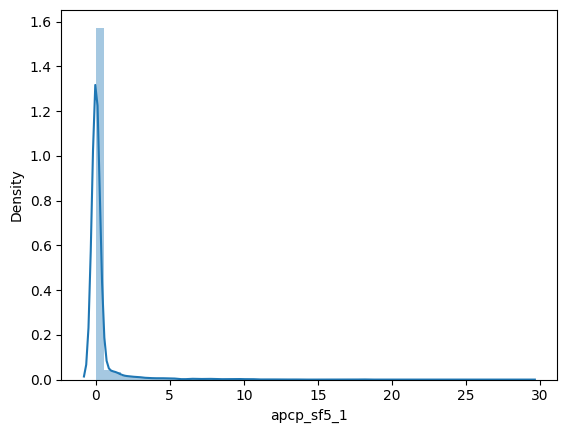

In [9]:
import seaborn

seaborn.distplot(disp_df["apcp_sf5_1"])
#seaborn.distplot(scaled_matrix[4])
#seaborn.boxplot(scaled_matrix[4])

###Comprobamos la correlación con la salida


In [11]:
lista_salida=[]
for i in disp_df:
    print("correlación salida con ", i, disp_df[i].corr(disp_df["salida"]))
    if disp_df[i].corr(disp_df["salida"])>0.85 or disp_df[i].corr(disp_df["salida"])<-0.85:
      lista_salida.append(i)

print(lista_salida)

correlación salida con  apcp_sf1_1 -0.16213021417225146
correlación salida con  apcp_sf2_1 -0.22693195305515088
correlación salida con  apcp_sf3_1 -0.25482657684032034
correlación salida con  apcp_sf4_1 -0.24638359175743108
correlación salida con  apcp_sf5_1 -0.251709690802096
correlación salida con  dlwrf_s1_1 0.36538671151738716
correlación salida con  dlwrf_s2_1 0.3324084177854513
correlación salida con  dlwrf_s3_1 0.37153024058007206
correlación salida con  dlwrf_s4_1 0.4618079055814155
correlación salida con  dlwrf_s5_1 0.47720762545798917
correlación salida con  dswrf_s1_1 0.13360641876924823
correlación salida con  dswrf_s2_1 0.8246218105528994
correlación salida con  dswrf_s3_1 0.8802982839969848
correlación salida con  dswrf_s4_1 0.875697345874555
correlación salida con  dswrf_s5_1 0.8773294983106668
correlación salida con  pres_ms1_1 -0.2854430805293465
correlación salida con  pres_ms2_1 -0.2922649346561904
correlación salida con  pres_ms3_1 -0.302003504480284
correlación sal

## Hipótesis



Podemos ver que la columna "uswrf_s1_1" es inútil.
También tenemos en la variable "lista" el array que incluye las combinaciones de variables altamente relacionadas unas con otras. Por último en lista_salida tenemos las columnas altamente correlacionadas con la salida.
Hemos decidido por lo cual reducir el dataset quitando la columna inútil, también vamos a minimizar el número de variables.
No vamos a borrar las variables con baja correlación con la salida ya que dicha correlación es sólo lineal así que al eliminarla podriamos quitar variables altamente correlacionadas no linearmente.

In [12]:
disp_df = disp_df.drop(columns=['uswrf_s1_1'])

# Métodos básicos


Definición de las variables básicas: X, y, X_train, X_test, y_train e y_test

In [13]:
from sklearn.model_selection import train_test_split
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
print(disp_df["salida"].describe())
best_method=[{},{},{},{}]
#Sin ajuste, Con ajuste

count    4.380000e+03
mean     1.807402e+07
std      7.898549e+06
min      3.291000e+05
25%      1.240575e+07
50%      1.825620e+07
75%      2.505450e+07
max      3.232680e+07
Name: salida, dtype: float64


El valor de uswrf_s1_1 va a ser permamentemente eliminado ya que no aporta nada a ningún modelo.

También cabe destacar que para comparar modelos se usará RMSE y el tiempo de ejecución, valores que se añadiran a la lista "best_method" para poder compararlos más fácilmente más adelante. Para obtener el RMSE se utilizarán los 8 primeros años como train y los dos siguientes para validación. Cuando se ejecute un modelo por hiperparámetros omitidos simplemente se pondrá un sólo parámetro que será el por defecto (Si no se pone un hiperparámetro en "params" tambien se escoge el por defecto automáticamente).

## Modelo "dummy"

In [14]:
import time
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

param_grid = {'strategy': ['mean']}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()

# Definition of a 2-step process that self-adjusts 2 hyperpars
dummy = GridSearchCV(DummyRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

dummy.fit(X_train, y_train)
time_total=time.time()- time_now
print("Tiempo: ", time_total)
print("Using: ", dummy.best_estimator_)
print("dummy RMSE: ", dummy.best_score_, dummy.best_params_)

best_method[0]["Dummy_RMSE"]= dummy.best_score_
best_method[2]["Dummy_time"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.014002561569213867
Using:  DummyRegressor()
dummy RMSE:  -7813279.817410777 {'strategy': 'mean'}


##KNN

Sin definir los hiperparámetros

In [15]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler


# X, y, X_train, X_test, y_train, y_test ya están definidos en el anterior código

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [5], "weights": ["uniform"], "metric":["minkowski"]}


inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


knn = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

knn.fit(X_train_scaled, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("KNN RMSE: ", knn.best_score_, knn.best_params_, knn.multimetric_)

best_method[0]["KNN_RMSE"]= knn.best_score_
best_method[2]["KNN_time"]= time_total


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.14176368713378906
KNN RMSE:  -4655660.5876296675 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'} True


Ajuste de hiperparámetros (Número de vecinos, los pesos que se usarán y la métrica)

In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import PredefinedSplit

# Espacio de búsqueda
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(2,16,2),
              'metric': ['cityblock', 'cosine', 'euclidean', 'manhattan', 'minkowski']}


inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))


time_now = time.time()



knn = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

knn.fit(X_train_scaled, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("KNN RMSE: ", knn.best_score_, knn.best_params_)

best_method[1]["KNN_RMSE"]= knn.best_score_
best_method[3]["KNN_time"]= time_total


Fitting 1 folds for each of 70 candidates, totalling 70 fits
Tiempo:  9.371282815933228
KNN RMSE:  -3935553.7845196542 {'metric': 'cityblock', 'n_neighbors': 12, 'weights': 'distance'}


##Árboles de regresión

Sin definir los hiperparámetros

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

param_grid = {#'max_depth': [None],
              'min_samples_split': [2]}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


dt = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

dt.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("KNN RMSE: ", dt.best_score_, dt.best_params_)

best_method[0]["Decision_Tree_RMSE"]= dt.best_score_
best_method[2]["Decision_Tree_time"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.5079500675201416
KNN RMSE:  -4235645.280798833 {'min_samples_split': 2}


Con ajustado de hiperparámetros (La máxima profundidad y el número mínimo de hijos para realizar una división).

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import PredefinedSplit


param_grid = {'max_depth': range(2,10,1),
              'min_samples_split': range(2,10,1)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))
time_now = time.time()
tree_hyper = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

# Train the self-adjusting process
np.random.seed(42)
tree_hyper.fit(X_train, y_train)
time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Tree Ajuste RMSE: ", tree_hyper.best_score_, tree_hyper.best_params_)

best_method[1]["Decision_Tree_RMSE"]= tree_hyper.best_score_
best_method[3]["Decision_Tree_time"]= time_total

Fitting 1 folds for each of 64 candidates, totalling 64 fits
Tiempo:  7.353041172027588
Tree Ajuste RMSE:  -3620479.139968801 {'max_depth': 4, 'min_samples_split': 2}


##Regresor lineal

Sin definir los hiperparámetros

In [19]:
from sklearn.linear_model import LinearRegression

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Linear Regressor RMSE: ", lr.best_score_, lr.best_params_)

best_method[0]["Linear_Regressor_RMSE"]= lr.best_score_
best_method[2]["Linear_Regressor_time"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.10100650787353516
Linear Regressor RMSE:  -3068338.862347959 {}


Con ajuste de hiperparámetros (Lasso y Ridge)

In [20]:
from sklearn.linear_model import Ridge

param_grid = {
 'alpha': np.arange(0.00, 10000000, 100000)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()

lr = GridSearchCV(Ridge(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Linear Regressor RMSE: ", lr.best_score_, lr.best_params_)

best_method[1]["Ridge_RMSE"]= lr.best_score_
best_method[3]["Ridge_time"]= time_total

Fitting 1 folds for each of 100 candidates, totalling 100 fits
Tiempo:  2.227363348007202
Linear Regressor RMSE:  -3068338.8623482133 {'alpha': 0.0}


In [21]:
from sklearn.linear_model import Lasso


"""
param_grid = {
 'alpha': np.concatenate((np.arange(0.00, 1.0, 0.01),np.arange(0.00, 100.0, 1),np.arange(0.00, 10000.0, 100),np.arange(0.00, 1000000.0, 10000),np.arange(0.00, 100000000.0, 1000000))),
}
"""
param_grid = {
 'alpha': np.arange(0.00, 1000000, 100000)}
inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))



lr = GridSearchCV(Lasso(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=0, refit="neg_root_mean_squared_error")

time_now = time.time()
lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Linear Regressor RMSE: ", lr.best_score_, lr.best_params_)

best_method[1]["Lasso_RMSE"]= lr.best_score_
best_method[3]["Lasso_time"]= time_total

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+16, tolerance: 1.859e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

Tiempo:  3.957627296447754
Linear Regressor RMSE:  -3098299.8578873416 {'alpha': 0.0}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+16, tolerance: 2.304e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Como se puede observar la tercera ejecución da errores pero en ambos hiperparámetros obtenemos alpha 0 como mejor hiperparámetro. Se probó como se puede observar en el comentario una gran cantidad de valores de alpha e igualmente se mantenía en 0 como mejor valor.

#Conclusiones métodos básicos


En la comparación vamos a primero ver la clasificación con hiperparametros por omisión: 
Mejor RMSE:
Mejor tiempo:


In [22]:
print("Errores sin ajuste de hiperparámetros\n")
for i in best_method[0]:
  print(i+": \t\t",best_method[0][i])

print("\nErrores con ajuste de hiperparámetros\n")
for i in best_method[1]:
  print(i+": \t\t",best_method[1][i])

print("\nTiempo sin ajuste de hiperparámetros\n")
for i in best_method[2]:
  print(i+": \t\t",best_method[2][i])

print("\nTiempo con ajuste de hiperparámetros\n")
for i in best_method[3]:
  print(i+": \t\t",best_method[3][i])

Errores sin ajuste de hiperparámetros

Dummy_RMSE: 		 -7813279.817410777
KNN_RMSE: 		 -4655660.5876296675
Decision_Tree_RMSE: 		 -4235645.280798833
Linear_Regressor_RMSE: 		 -3068338.862347959

Errores con ajuste de hiperparámetros

KNN_RMSE: 		 -3935553.7845196542
Decision_Tree_RMSE: 		 -3620479.139968801
Ridge_RMSE: 		 -3068338.8623482133
Lasso_RMSE: 		 -3098299.8578873416

Tiempo sin ajuste de hiperparámetros

Dummy_time: 		 0.014002561569213867
KNN_time: 		 0.14176368713378906
Decision_Tree_time: 		 0.5079500675201416
Linear_Regressor_time: 		 0.10100650787353516

Tiempo con ajuste de hiperparámetros

KNN_time: 		 9.371282815933228
Decision_Tree_time: 		 7.353041172027588
Ridge_time: 		 2.227363348007202
Lasso_time: 		 3.957627296447754


En ambos casos podemos observar que el método con mínimo error es la regressión lineal. También podemos ver que el método Dummy es el que mayor error tiene, como era de esperar.
Aunque podemos observar que el ajuste de hiperparámetros en el Decision Tree Regressor supone una gran diferencia respecto a los valores por defecto.


También y como era predecible, el ajuste de hiperparámetros siempre supone una mejora. Ya que los valores por omisión emplean unos hiperparámetros por defecto, resulta obvio que estos no van a ser los mejores para el caso particular en el que nos encontramos.




En cuanto a los tiempos; vemos que los tiempos sin ajuste de hiperparámetros son bastante bajos para todos los métodos, especialmente el knn (porque no genera ningún modelo).

Los tiempos con ajuste de hiperparámetros son superiores, como es de esperar, ya que se realizan los modelos varias veces, para cada una de las posibilidades de hiperparámetros. El knn en este caso dura bastante más, pero es cierto que es en el que más hiperparámetros hemos seleccionado para que fueran ajustados (hemos tomado esta decisión porque knn es un método muy rápido, y nos permite probar muchos hiperparámetros a la vez). 
El método de los árboles de regresión sufre un aumento algo significativo de tiempo, pero sigue siendo bastante aceptable (únicamente son 7s). Y el regresor lineal no tiene un aumento excesivo en el tiempo de ejecución.

# Reduciendo la dimensionalidad


In [23]:
#Guardamos disp_df para hacer varias pruebas.
#Quitar correlacionadas entre sí
#Quitar poco correlacionadas con salida
#Ambas
disp_df_original = disp_df.copy()

## Correlación de 0.90

In [24]:
disp_df=disp_df_original.copy()
list_elimino =[]
list_dejo=[]

list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.90<=disp_df[i].corr(disp_df[k])<=0.90 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(len(list))

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    list_elimino.append(i[0])
    disp_df.drop(i[0], axis=1, inplace=True)

print(len(disp_df.columns))

apcp_sf2_1 ,  apcp_sf3_1  :  0.9231555742091835
dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s1_1 ,  dlwrf_s4_1  :  0.9182220153056898
dlwrf_s1_1 ,  dlwrf_s5_1  :  0.9104101371311166
dlwrf_s1_1 ,  pwat_ea1_1  :  0.9099458686566371
dlwrf_s1_1 ,  spfh_2m2_1  :  0.9002233133445948
dlwrf_s1_1 ,  tmin_2m1_1  :  0.9095022411243037
dlwrf_s1_1 ,  tmin_2m2_1  :  0.9121042480464999
dlwrf_s1_1 ,  tmin_2m3_1  :  0.911245247178662
dlwrf_s1_1 ,  tmp_2m_1_1  :  0.9125425943684065
dlwrf_s1_1 ,  tmp_sfc1_1  :  0.9322454405735551
dlwrf_s1_1 ,  ulwrf_s1_1  :  0.9222525014227944
dlwrf_s1_1 ,  ulwrf_s2_1  :  0.9094746767505025
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s2_1 ,  dlwrf_s4_1  :  0.9455072368728948
dlwrf_s2_1 ,  dlwrf_s5_1  :  0.936250827042379
dlwrf_s2_1 ,  pwat_ea1_1  :  0.9232752143738026
dlwrf_s2_1 ,  pwat_ea2_1  :  0.9180823045389639
dlwrf_s2_1 ,  pwat_ea3_1  :  0.9058231564176199
dlwrf_s2_1 ,  spfh_2m2_1  :  0.91692690740

In [25]:
from sklearn.linear_model import LinearRegression

X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("New RMSE : ", lr.best_score_)
print("Original values:", best_method[0]["Linear_Regressor_RMSE"])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.019771814346313477
New RMSE :  -3667368.4785081088
Original values: -3068338.862347959


## Correlación de 0.95

In [26]:
disp_df=disp_df_original.copy()
list_elimino =[]
list_dejo=[]

list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(len(list))

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    list_elimino.append(i[0])
    disp_df.drop(i[0], axis=1, inplace=True)

print(len(disp_df.columns))

dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s3_1 ,  dlwrf_s4_1  :  0.9714313070426391
dlwrf_s3_1 ,  dlwrf_s5_1  :  0.9628906707604897
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  dswrf_s3_1  :  0.9571667754289556
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
dswrf_s3_1 ,  uswrf_s2_1  :  0.964297736448637
dswrf_s3_1 ,  uswrf_s3_1  :  0.9620365523744548
dswrf_s4_1 ,  dswrf_s5_1  :  0.9846653842283272
pres_ms1_1 ,  pres_ms2_1  :  0.9861133756671324
pres_ms1_1 ,  pres_ms3_1  :  0.9501939300486043
pres_ms2_1 ,  pres_ms3_1  :  0.9855174686825475
pres_ms3_1 ,  pres_ms4_1  :  0.9852195616314235
pres_ms3_1 ,  pres_ms5_1  :  0.9503729775888822
pres_ms4_1 ,  pres_ms5_1  :  0.983982500363903
pwat_ea1_1 ,  pwat_ea2_1  :  0.987536536664307
pwat_ea1_1 ,  pwat_ea3_1  :  0.963475239218834
pwat_ea2_1 ,  pwat_ea3_1  :  0.9888327077899062
pwat_ea2_1 ,  pwat_ea4_1  :  0.9641615077236

In [27]:
from sklearn.linear_model import LinearRegression

X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()



lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("New RMSE : ", lr.best_score_)
print("Original values:", best_method[0]["Linear_Regressor_RMSE"])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.04466605186462402
New RMSE :  -3307796.7510604677
Original values: -3068338.862347959


##Correlación de 0.99

In [28]:
disp_df=disp_df_original.copy()
list_elimino =[]
list_dejo=[]

list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.99<=disp_df[i].corr(disp_df[k])<=0.99 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(len(list))

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    list_elimino.append(i[0])
    disp_df.drop(i[0], axis=1, inplace=True)

print(len(disp_df.columns))

dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
tcdc_ea1_1 ,  tcolc_e1_1  :  0.999977884315217
tcdc_ea2_1 ,  tcolc_e2_1  :  0.9999803755794225
tcdc_ea3_1 ,  tcolc_e3_1  :  0.9999795855646263
tcdc_ea4_1 ,  tcolc_e4_1  :  0.999975898110073
tcdc_ea5_1 ,  tcolc_e5_1  :  0.9999715058573335
tmax_2m1_1 ,  ulwrf_s1_1  :  0.9924162717155949
tmax_2m2_1 ,  tmp_2m_2_1  :  0.9992834032396157
tmax_2m2_1 ,  tmp_sfc2_1  :  0.9918925672159637
tmax_2m2_1 ,  ulwrf_s3_1  :  0.9909487821493767
tmax_2m3_1 ,  tmax_2m4_1  :  0.9932155319672418
tmax_2m3_1 ,  tmax_2m5_1  :  0.9918528530224062
tmax_2m3_1 ,  tmin_2m4_1  :  0.9986140521743142
tmax_2m3_1 ,  tmp_2m_3_1  :  0.9994790214287826
tmax_2m3_1 ,  tmp_2m_4_1  :  0.990917632685966
tmax_2m4_1 ,  tmax_2m5_1  :  0.9997763091522931
tmax_2m4_1 ,  tmin_2m4_1  :  0.995227401324633
tmax_2m4_1 ,  tmin_2m5_1  :  0.9902281962655157
tmax_2m4_1 ,  tmp_2m_3_1  :  0.9942060791070

In [29]:
from sklearn.linear_model import LinearRegression

X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()



lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("New RMSE : ", lr.best_score_)
print("Original values:", best_method[0]["Linear_Regressor_RMSE"])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.03740239143371582
New RMSE :  -3133771.048152403
Original values: -3068338.862347959


##Correlación de 0.95 pero quitando las menos correlacionadas con la salida

In [30]:
disp_df=disp_df_original.copy()
list_elimino =[]
list_dejo=[]
list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    if disp_df[i[0]].corr(disp_df["salida"])<disp_df[i[1]].corr(disp_df["salida"]):
      list_elimino.append(i[0])
      disp_df.drop(i[0], axis=1, inplace=True)
    elif disp_df[i[0]].corr(disp_df["salida"])>disp_df[i[1]].corr(disp_df["salida"]):
      list_elimino.append(i[1])
      disp_df.drop(i[1], axis=1, inplace=True)

#Está eliminando uswrf_s3_1 que está muy correlacionada, revisarlo
print(lista_salida)
print(list_elimino)
for i in lista_salida:
  if i in list_elimino:
    print(i)

dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s3_1 ,  dlwrf_s4_1  :  0.9714313070426391
dlwrf_s3_1 ,  dlwrf_s5_1  :  0.9628906707604897
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  dswrf_s3_1  :  0.9571667754289556
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
dswrf_s3_1 ,  uswrf_s2_1  :  0.964297736448637
dswrf_s3_1 ,  uswrf_s3_1  :  0.9620365523744548
dswrf_s4_1 ,  dswrf_s5_1  :  0.9846653842283272
pres_ms1_1 ,  pres_ms2_1  :  0.9861133756671324
pres_ms1_1 ,  pres_ms3_1  :  0.9501939300486043
pres_ms2_1 ,  pres_ms3_1  :  0.9855174686825475
pres_ms3_1 ,  pres_ms4_1  :  0.9852195616314235
pres_ms3_1 ,  pres_ms5_1  :  0.9503729775888822
pres_ms4_1 ,  pres_ms5_1  :  0.983982500363903
pwat_ea1_1 ,  pwat_ea2_1  :  0.987536536664307
pwat_ea1_1 ,  pwat_ea3_1  :  0.963475239218834
pwat_ea2_1 ,  pwat_ea3_1  :  0.9888327077899062
pwat_ea2_1 ,  pwat_ea4_1  :  0.9641615077236

In [31]:
from sklearn.linear_model import LinearRegression

X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()

lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("New RMSE : ", lr.best_score_)
print("Original values:", best_method[0]["Linear_Regressor_RMSE"])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.04822707176208496
New RMSE :  -3362822.142589164
Original values: -3068338.862347959


Como podemos observar, esta implementación no mejora, posiblemente debido a que si bien no linealmente, muchas variables están correlacionadas con la salida y "que tan correlacionadas estan linearmente" no es un buen filtro.

##Correlación de 0.95 pero sólo las áltamente correlacionadas con la salida

In [32]:
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
for i in disp_df:
  if i not in lista_salida:
    disp_df.drop(i, axis=1, inplace=True)
print(disp_df)

       dswrf_s3_1  dswrf_s5_1    salida
V1     200.000000  350.000000  11652000
V2     147.272727  343.636364  10571100
V3     200.000000  359.090909  12366600
V4     210.000000  367.545455  12795600
V5     195.454545  291.818182   7554600
V6     199.090909  349.090909   8979600
V7     198.181818  370.818182  12240300
V8     204.545455  377.363636  12172500
V9     196.363636  366.090909  12120600
V10    199.090909  370.000000  12630900
V11    202.727273  379.363636  12928500
V12    208.181818  349.363636  12282600
V13    210.000000  380.000000  13062600
V14    210.000000  390.000000  13242300
V15    198.181818  381.818182  10864200
V16    111.818182  306.363636   7086600
V17    210.000000  395.363636  13199400
V18    210.000000  400.181818  13367700
V19    220.000000  405.272727  13399500
V20    117.272727  239.727273   1643400
V21    140.272727  370.000000   3495300
V22    194.545455  389.727273   4229100
V23    220.000000  416.272727  11795700
V24    201.818182  360.818182   6990600


In [33]:
from sklearn.linear_model import LinearRegression

X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("New RMSE : ", lr.best_score_)
print("Original values:", best_method[0]["Linear_Regressor_RMSE"])

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  0.021666288375854492
New RMSE :  -3692529.232291475
Original values: -3068338.862347959


Ésta elección obviamente es muy mala ya que estamos construyendo un modelo de regresión lineal a partir de sólo 3 variables. Sin embargo, cabe destacar que tiene un RMSE bastante cercano al que obtenemos al quitar variables correlacionadas entre sí linearmente (con un umbral del 90% de correlación).

##Conclusiones ajuste de dimensionalidad

Como se puede observar, al quitar columnas no mejora el error, sino que empeora. Esto probablemente se debe a que para este caso Linear Regresion se beneficia de una mayor cantidad de columnas (Por eso quitando las de correlación 0.9 tenemos una peor métrica que quitando las de correlación 0.99, que son menos). Por ello hemos determinado que por ahora el mejor modelo es Linear Regression con todas las columnas no 0.

# Métodos avanzados

In [34]:
disp_df=disp_df_original.copy()
from sklearn.model_selection import train_test_split
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)

##SVM

Sin ajuste de hiperparámetros:

In [35]:
from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = RobustScaler()



time_now = time.time()
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

np.random.seed(42)
hpo_regr = GridSearchCV(pipe_regr, 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1,
                            verbose=1,
                            refit="neg_root_mean_squared_error",
                            )


np.random.seed(42)
hpo_regr.fit(X=X_train, y=y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("SVM RMSE: ", hpo_regr.best_score_)

best_method[0]["SVM_RMSE"]= hpo_regr.best_score_
best_method[2]["SVM_time"]= time_total


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  6.046970844268799
SVM RMSE:  -7834335.984374058


Con ajuste de hiperparámetros

In [36]:
from scipy.stats.distributions import loguniform
from sklearn.model_selection import RandomizedSearchCV
# Search space
param_grid = {'SVM__C': loguniform(1e6, 1e11),
              'SVM__gamma': loguniform(1e-8, 1e-5)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))


np.random.seed(42)
budget = 20 
hpo_regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1,
                            verbose=1,
                            refit="neg_root_mean_squared_error",
                            n_iter= budget
                            )



np.random.seed(42)
time_now = time.time()
hpo_regr.fit(X=X_train, y=y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("SVM RMSE: ", hpo_regr.best_score_, hpo_regr.best_params_)

best_method[1]["SVM_RMSE"]= hpo_regr.best_score_
best_method[3]["SVM_time"]= time_total

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Tiempo:  98.23872637748718
SVM RMSE:  -3609513.4434330794 {'SVM__C': 4570563099.801452, 'SVM__gamma': 6.251373574521747e-07}


##Random forests

**NOTA**: No recomendamos ejecutar los bloques de código de esta sección (Especialmente el ajuste de hiperparámetros de random forest) ni la siguiente ya que se trata de random forest con las 74 columnas, lo cual supone una gran cantidad de tiempo. Los resultados no eran mejores que Linear Regression.

Sin ajuste de hiperparámetros

In [37]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()



r_forest = GridSearchCV(RandomForestRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=-1, verbose=1, refit="neg_root_mean_squared_error")

r_forest.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Random Forest RMSE: ", r_forest.best_score_, r_forest.best_params_)

best_method[0]["Random_forest_RMSE"]= r_forest.best_score_
best_method[2]["Random_forest_time"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  39.16413927078247
Random Forest RMSE:  -3170982.5054148147 {}


Con ajuste de hiperparámetros

In [38]:
# Search space
param_grid = {'n_estimators': range(100, 1000, 100),
              'max_depth': range(2,30,1),
              'min_samples_split': range(2,10,1)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))
budget = 10
rf_hyper = RandomizedSearchCV(RandomForestRegressor(), 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1, verbose=1,
                            n_iter=budget,
                            refit="neg_root_mean_squared_error"
                        )

np.random.seed(42)
time_now = time.time()
rf_hyper.fit(X_train, y_train)
time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Linear Regressor RMSE: ", rf_hyper.best_score_, rf_hyper.best_params_)

best_method[1]["Random_forest_RMSE"]= rf_hyper.best_score_
best_method[3]["Random_forest_time"]= time_total

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Tiempo:  574.0492858886719
Linear Regressor RMSE:  -3119682.4054025076 {'n_estimators': 700, 'min_samples_split': 3, 'max_depth': 17}


## Importancia de los atributos

Para ver la importancia de los atributos, usaremos el último modelo de random forest

In [39]:
for i in range(23):
  print(rf_hyper.best_estimator_.feature_names_in_[i], ": ", rf_hyper.best_estimator_.feature_importances_[i])

apcp_sf1_1 :  0.003974544308941571
apcp_sf2_1 :  0.005932105836699588
apcp_sf3_1 :  0.007419014352473642
apcp_sf4_1 :  0.002781251219658144
apcp_sf5_1 :  0.0055444734483748245
dlwrf_s1_1 :  0.0019093069803193888
dlwrf_s2_1 :  0.0012967290074075665
dlwrf_s3_1 :  0.0013426957133868855
dlwrf_s4_1 :  0.0011341070260456573
dlwrf_s5_1 :  0.0013445148800378523
dswrf_s1_1 :  0.00025659669239331715
dswrf_s2_1 :  0.0034308168211434264
dswrf_s3_1 :  0.4519146733253291
dswrf_s4_1 :  0.2779660844176426
dswrf_s5_1 :  0.024823001183624585
pres_ms1_1 :  0.002797595866173005
pres_ms2_1 :  0.001596548639492904
pres_ms3_1 :  0.0016275970845029397
pres_ms4_1 :  0.001870761866663778
pres_ms5_1 :  0.0023933905352139886
pwat_ea1_1 :  0.0027383757698817624
pwat_ea2_1 :  0.0019579038947034623
pwat_ea3_1 :  0.002050526682192551


Podemos observar que los atributos más importantes son dswr_s5_1 (que tiene que ver con el flujo de radiación solar de onda corta) y uswrf_s3_1 (que también tiene que ver con ese tipo de radiación, en este caso upward). Uswrf_s2_1 también tiene algo de importancia (ya que seguramente sea parecido al atributo anterior). Los demás atributos tienen menor importancia, y muchos no llegan ni a ser considerados.

# Reducción de la dimensionalidad

In [40]:
disp_df=disp_df_original.copy()
list_elimino =[]
list_dejo=[]

list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        #print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(len(list))

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    list_elimino.append(i[0])
    disp_df.drop(i[0], axis=1, inplace=True)

print(len(disp_df.columns))

249
24


## SVM quitando correlacion 0.95


Sin ajuste de hiperparámetros:

In [41]:
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
scaler = RobustScaler()

time_now = time.time()
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

np.random.seed(42)
hpo_regr = GridSearchCV(pipe_regr, 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1,
                            verbose=1,
                            refit="neg_root_mean_squared_error"
                            )

np.random.seed(42)
hpo_regr.fit(X=X_train, y=y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("SVM RMSE: ", hpo_regr.best_score_)
best_method[0]["SVM_RMSE_reduced_dimension"]= hpo_regr.best_score_
best_method[2]["SVM_time_reduced_dimension"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  1.7604947090148926
SVM RMSE:  -7834336.043189813


Con ajuste de hiperparámetros

In [42]:
from scipy.stats.distributions import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'SVM__C': loguniform(1e6, 1e11),
              'SVM__gamma': loguniform(1e-8, 1e-5)}



np.random.seed(42)
budget = 20 
hpo_regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1,
                            verbose=1,
                            refit="neg_root_mean_squared_error",
                            n_iter= budget
                            )


np.random.seed(42)

time_now = time.time()
hpo_regr.fit(X=X_train, y=y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("SVM RMSE: ", hpo_regr.best_score_, hpo_regr.best_params_)

best_method[0]["SVM_RMSE_reduced_dimension"]= hpo_regr.best_score_
best_method[3]["SVM_time_reduced_dimension"]= time_total

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Tiempo:  86.5147020816803
SVM RMSE:  -3835324.9830477485 {'SVM__C': 4570563099.801452, 'SVM__gamma': 6.251373574521747e-07}


Podemos observar que en el caso de SVM el ajuste de hiperparámetros supone una gran mejora, haciendo que el modelo pase a ser el peor (incluso peor que el Dummy) a ser ligeramente mejor en error que KNN.

##Random forest quitando 0.95

Sin ajuste de hiperparámetros:

In [43]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


r_forest = GridSearchCV(RandomForestRegressor(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=-1, verbose=1, refit="neg_root_mean_squared_error")

r_forest.fit(X_train, y_train)

time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Random Forest RMSE: ", r_forest.best_score_, r_forest.best_params_)

best_method[0]["Random_forest_RMSE_reduced_dimension"]= r_forest.best_score_
best_method[2]["Random_forest_time_reduced_dimension"]= time_total

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Tiempo:  13.172094345092773
Random Forest RMSE:  -3185063.0477553257 {}


Con ajuste de hiperparámetros:

In [ ]:


X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)


param_grid = {'n_estimators': range(100, 1000, 100),
              'max_depth': range(2,30,1),
              'min_samples_split': range(2,20,1)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

budget = 10
rf_hyper = RandomizedSearchCV(RandomForestRegressor(), 
                            param_grid,
                            scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                            cv=inner, 
                            n_jobs=-1, verbose=3,
                            n_iter=budget,
                            refit="neg_root_mean_squared_error"
                        )

np.random.seed(42)
time_now = time.time()
rf_hyper.fit(X_train, y_train)
time_total=time.time()- time_now
print("Tiempo: ", time_total)

print("Linear Regressor RMSE: ", rf_hyper.best_score_, rf_hyper.best_params_)

best_method[1]["Random_forest_RMSE_reduced_dimension"]= rf_hyper.best_score_
best_method[3]["Random_forest_time_reduced_dimension"]= time_total

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Tiempo:  204.83579349517822
Linear Regressor RMSE:  -3165957.895706457 {'n_estimators': 400, 'min_samples_split': 12, 'max_depth': 21}


Podemos observar que con la dimensionalidad reducida, aunque no varía mucho el error final, sí que disminuyen los tiempos significativamente; por lo que para estos métodos avanzados, que tardan bastante tiempo, es mejor intentar disminuir al máximo la dimensionalidad. Ya que el RMSE posiciona a random forest como el segundo mejor candidato a modelo final.

# Resultados y conclusiones

Tras haber comprobado distintos métodos, los métodos obtenidos son los siguientes:

In [44]:
print("Errores sin ajuste de híperparámetros\n")
for i in best_method[0]:
  print(i+": \t\t",best_method[0][i])


print("\nErrores con ajuste de híperparámetros\n")
for i in best_method[1]:
  print(i+": \t\t",best_method[1][i])

print("\nTiempo sin ajuste de hiperparámetros\n")
for i in best_method[2]:
  print(i+": \t\t",best_method[2][i])

print("\nTiempo con ajuste de hiperparámetros\n")
for i in best_method[3]:
  print(i+": \t\t",best_method[3][i])


Errores sin ajuste de híperparámetros

Dummy_RMSE: 		 -7813279.817410777
KNN_RMSE: 		 -4655660.5876296675
Decision_Tree_RMSE: 		 -4235645.280798833
Linear_Regressor_RMSE: 		 -3068338.862347959
SVM_RMSE: 		 -7834335.984374058
Random_forest_RMSE: 		 -3170982.5054148147
SVM_RMSE_reduced_dimension: 		 -3835324.9830477485
Random_forest_RMSE_reduced_dimension: 		 -3185063.0477553257

Errores con ajuste de híperparámetros

KNN_RMSE: 		 -3935553.7845196542
Decision_Tree_RMSE: 		 -3620479.139968801
Ridge_RMSE: 		 -3068338.8623482133
Lasso_RMSE: 		 -3098299.8578873416
SVM_RMSE: 		 -3609513.4434330794
Random_forest_RMSE: 		 -3119682.4054025076

Tiempo sin ajuste de hiperparámetros

Dummy_time: 		 0.014002561569213867
KNN_time: 		 0.14176368713378906
Decision_Tree_time: 		 0.5079500675201416
Linear_Regressor_time: 		 0.10100650787353516
SVM_time: 		 6.046970844268799
Random_forest_time: 		 39.16413927078247
SVM_time_reduced_dimension: 		 1.7604947090148926
Random_forest_time_reduced_dimension: 		 

Podemos observar pues que Linear Regresion es el mejor modelo a elegir, ya que tiene el menor error y el menor tiempo de ejecución (sin considerar el Dummy). Por lo que la evaluación final se hará con el Linear Regressor.

# Evaluación final y guardado

Vamos a ejecutar el código de entrenamiento de dos maneras distintas, la primera es empleando GridSearch mientras que la segunda será con el método básico (este modelo será el que guardaremos). Hemos decidido no utilizar ajuste de hiperparámetros ya que ni Lasso ni Ridge suponían una mejora en ningún aspecto.

In [45]:
#Hacemos lo mismo pero en vez de para validation con test.
from sklearn.model_selection import train_test_split
disp_df=disp_df_original.copy()
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
from sklearn.linear_model import LinearRegression

param_grid = {}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))

time_now = time.time()


lr = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring=('neg_root_mean_squared_error', "neg_mean_absolute_error"),
                   cv=inner, 
                   n_jobs=1, verbose=1, refit="neg_root_mean_squared_error")

lr.fit(X_train, y_train)

y_predicted=lr.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_predicted))

print(rmse, lr.best_score_, time.time()-time_now)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
3052441.165997784 -3068338.862347959 0.07457661628723145


In [46]:
time_now = time.time()

lr = LinearRegression()

lr.fit(X_train, y_train)

y_predicted=lr.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_predicted))

print(rmse, time.time()-time_now)

3052441.165997784 0.030637264251708984


Se puede observar que ambos modelos (por ser los mismos) tienen el mismo RMSE. Sin embargo el score y el rmse calculado con la producción no es el mismo. Esta pequeña diferencia se da gracias a que GridSearchCV sólo está entrenando al modelo con los 8 primeros años mientras que al hacer fit le entrenamos con los 10 primeros (de ahí la mejora de la segunda opción).


Ahora entrenamos el modelo con todos los datos sabiendo que su rmse será mejor que 3,052,441.17

In [47]:

lr = LinearRegression()
lr.fit(X, y)

import pickle

pickle_file= open("modelo_final.pkl", "wb")
pickle.dump(lr, pickle_file)